# Twitter in Politics: Active Player or Passive Chronicler?

![Image of Hill and Bern](https://localtvwiti.files.wordpress.com/2016/02/sanders.jpg?w=770&h=433)

## What sort of role does Twitter play during the Democratic Primary?
#### May 2016
#### Created by: Samantha Hoffmann & Ewa Maciukiewicz


Ewa Maciukiewicz has been working in digital advertising, specializing in programmatic, since 2009. She is a Product Manager currently working in machine learning and data optimization. She focuses on operational efficiencies through developing tools that streamline planning and execution within her organization. 

Samantha Hoffmann has been working in media sales & marketing for 3 years. She is currently an Account Executive who provides strategic solutions for top tier clients and develops efficient internal processes across multiple departments.



## Why Twitter and politics?

We chose to focus our project on the timely cross-section of Twitter and American Politics due to how intrinsic social media is to everyday life, let alone a major cultural event such as this year's election. We wanted to see what (if any) impact a candidate's twitter presence has on election results during the primary, and how a canidate's performance may then also be reflected through their Twitter behavior. 

In such a high stakes game as the US Presidential Election... 
- are candidates connecting with the American people to foster more *'I'm with her'* sentiment versus 'Who does she think she is?!' 
- are they tapping into the power of social media to truly *make America great again?*

In 2016, when such a large percentage of voters have spent most of their lives connected to social media...
- can a candidate afford to be less than averagely active on these platforms? 
- is it quantity or quality of engagements that wins out during a heated primary election season? 

Below, we will utilize Twitter data and Democratic Primary election data to see whether Hillary CLinton and Bernie Sanders fair successfully or end up crashing and *feeling the bern*...

## Importing Packages

First, import all packages and modules needed to work with the data.

In [55]:
import sys                             # system module 
import pandas as pd                    # data package
import matplotlib.pyplot as plt        # graphics module  
import datetime as dt                  # date and time module
import numpy as np                     # foundation for Pandas 
import tweepy                          # Twitter API wrapper 
import json
%matplotlib inline   

from plotly.offline import iplot, iplot_mpl                   # plotly imports
import plotly.graph_objs as go               
import plotly                             
import cufflinks as cf                      
cf.set_config_file(offline=True, offline_show_link=False)            
plotly.offline.init_notebook_mode()

pd.set_option('display.mpl_style', 'default')                 # Make the graphs prettier

/Users/Samantha/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning:


mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.




## Creating and Prepping the Datasets

**Twitter:**
In order to access data via the Twitter API, we had to register for an "application" that can integrate with Twitter. We are not actually integrating any applications, however, we still need to go through this process as Twitter considers all users as potential Twitter application developers.

Instructions on registering for credentials can be found on the twitter for developers: https://dev.twitter.com/oauth/overview/application-owner-access-tokens

We will be using Tweepy, a python Twitter API wrapper, to interact with the Twitter data.


**Democratic Primary Election:**
We had to create a csv with this data offline, and will include steps below to access said file, "2016 Democratic Primary Results.csv" (emailed along with this workbook).

In [56]:
consumer_key = '9QBuUD4uvjy8FDBcLSuUK9I2I'
consumer_secret = 'NYsobcxgUE6Gv5UyusRE3fj8lrmsI5OsIDpUrf7fzVC3uIugGr'

access_token = '29009929-3efFzAePX2CFTUTrrwV5J3WbU0LWwyzGnbET4xJso'
access_secret = 'KDQD725blNsSBNsddeEo3AE3wIinRPEUD29BClPEiw0Ap'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [57]:
hilz = api.get_user('HillaryClinton') # Get the User object for Hillary Clinton
bern = api.get_user('berniesanders') # Get the User object for Bernie Sanders

print (hilz.screen_name,'has', hilz.followers_count, 'followers')
print(bern.screen_name,'has', bern.followers_count, 'followers')

HillaryClinton has 6117938 followers
BernieSanders has 2095103 followers


Once we were able to confirm that we have access to the Twitter API to access both Hillary Clinton's and Bernie Sanders' tweets, we ran a query for a single candidate's tweet. This allowed us to see what sort of data parameters we can access for a single Tweet. 

A list of all the parameteres is also available here: https://dev.twitter.com/overview/api/users

In [58]:

result = api.search(q='from:HillaryClinton')      #Perform a basic search query where we 
                                                  #search for the candidate's tweets
len(result)                                       #Print the number of items returned by the search query to 
                                                  #verify our query ran (15 by default).


15

In [59]:
tweet = result[0]                                #Get the first tweet in the result
                                                
for param in dir(tweet):           #Analyze the data in one tweet to see what elements we can pull into our dataset
                                   #key names beginning with an '_' are hidden and usually not required, so we'll skip
    if not param.startswith("_"):
        print ("%s : %s\n" % (param, eval('tweet.'+param)))

author : User(_json={'url': 'https://t.co/qqt83R8Fqb', 'friends_count': 651, 'time_zone': 'Eastern Time (US & Canada)', 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/1339835893/1456099152', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/723489042420097024/BAsl5SPE_normal.jpg', 'created_at': 'Tue Apr 09 18:04:35 +0000 2013', 'geo_enabled': True, 'is_translator': False, 'notifications': False, 'listed_count': 25738, 'default_profile': False, 'name': 'Hillary Clinton', 'favourites_count': 1058, 'location': 'New York, NY', 'id': 1339835893, 'is_translation_enabled': False, 'profile_link_color': '0057B8', 'profile_text_color': '000000', 'follow_request_sent': False, 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'following': False, 'id_str': '1339835893', 'contributors_enabled': False, 'screen_name': 'HillaryClinton', 'has_extended_profile': True, 'verified': True, 'profile_use_background_image': False, 'profile_si

A single tweet holds a large amount of information!

Now we define a function to pull all tweets from a particular screen_name:

In [60]:
alltweets = []
                                                                 #Twitter has a restriction on how 
def get_all_tweets(screen_name):                                 #many tweets we can pull: approx.3200
                                                                 #make initial request for most recent tweets 
                                                                 #(200 is the maximum allowed count)
    new_tweets = api.user_timeline(
        screen_name = screen_name,count=200)
    
    alltweets.extend(new_tweets)                                  #save most recent tweets
    
    oldest = alltweets[-1].id - 1                                 #save the id of the oldest tweet less one

    while len(new_tweets) > 0:                                    #keep grabbing tweets until there are 
        print ("getting tweets before %s" % (oldest))             #no tweets left to grab
        new_tweets = api.user_timeline(
            screen_name = screen_name,count=200,max_id=oldest)    #all subsequent requests 
                                                                  #use the max_id param to prevent duplicates

        alltweets.extend(new_tweets)                              #save most recent tweets again
        oldest = alltweets[-1].id - 1

        print ("...%s tweets downloaded so far" % (len(alltweets)))

Pull tweets for Hillary Clinton:

In [61]:
if __name__ == '__main__':
        get_all_tweets("HillaryClinton")

getting tweets before 722620394734231552
...400 tweets downloaded so far
getting tweets before 718477727481917440
...600 tweets downloaded so far
getting tweets before 713172429569449983
...800 tweets downloaded so far
getting tweets before 708123394563284992
...1000 tweets downloaded so far
getting tweets before 704742145840668671
...1200 tweets downloaded so far
getting tweets before 701045886131052545
...1399 tweets downloaded so far
getting tweets before 697458033392091135
...1599 tweets downloaded so far
getting tweets before 695082697924984831
...1798 tweets downloaded so far
getting tweets before 692504890652913663
...1998 tweets downloaded so far
getting tweets before 688510568412532735
...2198 tweets downloaded so far
getting tweets before 684509267253039103
...2398 tweets downloaded so far
getting tweets before 676953837530390532
...2598 tweets downloaded so far
getting tweets before 671463011777945603
...2798 tweets downloaded so far
getting tweets before 665724198925393919


Add in Bernie Sanders Tweets

In [62]:
if __name__ == '__main__':
        get_all_tweets("BernieSanders")

getting tweets before 722159292179025919
...3640 tweets downloaded so far
getting tweets before 718555037631324161
...3840 tweets downloaded so far
getting tweets before 714543084659425280
...4040 tweets downloaded so far
getting tweets before 711578318080856063
...4240 tweets downloaded so far
getting tweets before 707793658267836415
...4440 tweets downloaded so far
getting tweets before 705487169004163072
...4640 tweets downloaded so far
getting tweets before 703286723376127999
...4840 tweets downloaded so far
getting tweets before 700731588900851711
...5040 tweets downloaded so far
getting tweets before 697987030110900225
...5240 tweets downloaded so far
getting tweets before 695455412326416383
...5437 tweets downloaded so far
getting tweets before 693570235970883583
...5635 tweets downloaded so far
getting tweets before 691403299019296768
...5835 tweets downloaded so far
getting tweets before 688789755618656255
...6035 tweets downloaded so far
getting tweets before 6854592128816906

Next, we create a function that converts the given list of tweets into a Pandas DataFrame. Note: we only chose a subset of tweet and user attributes to include that we think will be useful for our analysis.

In [63]:
def toDataFrame(tweets):

    DataSet = pd.DataFrame()

    DataSet['tweetID'] = [tweet.id for tweet in tweets]
    DataSet['tweetText'] = [tweet.text for tweet in tweets]
    DataSet['tweetRetweetCt'] = [tweet.retweet_count for tweet in tweets]
    DataSet['tweetFavoriteCt'] = [tweet.favorite_count for tweet in tweets]
    DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
    DataSet['userID'] = [tweet.user.id for tweet in tweets]
    DataSet['userScreen'] = [tweet.user.screen_name for tweet in tweets]
    DataSet['userName'] = [tweet.user.name for tweet in tweets]
    DataSet['userFollowerCt'] = [tweet.user.followers_count for tweet in tweets]
    DataSet['userFriendsCt'] = [tweet.user.friends_count for tweet in tweets]

    return DataSet

DataSet = toDataFrame(alltweets)                    



In [64]:
from datetime import datetime as dt, date, time

DataSet['tweetDate'] = DataSet['tweetCreated']

In [65]:
DataSet['tweetDate'] = DataSet['tweetDate'].dt.strftime('%m/%d/%Y')

In [66]:
DataSet['tweetDate'] = pd.to_datetime(DataSet['tweetDate'])

In [67]:
DataSet['tweetDates'] = pd.to_datetime(DataSet['tweetDate'])
DataSet.head(5)

,tweetID,tweetText,tweetRetweetCt,tweetFavoriteCt,tweetCreated,userID,userScreen,userName,userFollowerCt,userFriendsCt,tweetDate,tweetDates
0,727893529658335234,RT @TheBriefing2016: If it looks like a demago...,468,0,2016-05-04 16:11:55,1339835893,HillaryClinton,Hillary Clinton,6117939,651,2016-05-04,2016-05-04
1,727878891646423044,We know Donald Trump is not who we are. If you...,1411,2777,2016-05-04 15:13:45,1339835893,HillaryClinton,Hillary Clinton,6117939,651,2016-05-04,2016-05-04
2,727863490757668864,There's only one candidate left who can stop a...,708,1878,2016-05-04 14:12:33,1339835893,HillaryClinton,Hillary Clinton,6117939,651,2016-05-04,2016-05-04
3,727845367996256256,"""As he goes after women, as he goes after lite...",1489,3338,2016-05-04 13:00:33,1339835893,HillaryClinton,Hillary Clinton,6117939,651,2016-05-04,2016-05-04
4,727670062782545924,Donald Trump is the presumptive @GOP nominee.\...,2411,5424,2016-05-04 01:23:57,1339835893,HillaryClinton,Hillary Clinton,6117939,651,2016-05-04,2016-05-04


We now are going to create a few additional data sets to later highlight different aspects of the Twitter data in our visuals.

In [68]:
Primary = DataSet[(DataSet['tweetDate'] > '2016-01-31') & (DataSet['tweetDate'] <= '2016-04-27')] 
                #selecting tweets in desired timeframe


In [69]:
Primary.groupby('userScreen').tweetFavoriteCt.sum() #pulling sum of tweet favorites by candidate

userScreen
BernieSanders     6794691
HillaryClinton    3796509
Name: tweetFavoriteCt, dtype: int64

In [70]:
Primary.groupby('userScreen').tweetRetweetCt.sum()  #pulling sum of tweet retweets by candidate

userScreen
BernieSanders     4079691
HillaryClinton    2025656
Name: tweetRetweetCt, dtype: int64

In [72]:
number_tweets=Primary.tweetDate.dt.strftime('%m/%d/%Y').value_counts().sort_index() 
     #creating set of amount of tweets per day in total

In [75]:
TweetsbyCandidate = Primary.groupby('userScreen').tweetDate.value_counts().sort_index()

AllCandidateTweets = TweetsbyCandidate.unstack()

    #creating set of amount of tweets per day separated by candidate

Now import and read the **2016 Democratic Primary Results** csv and assign it to a new DataFrame.

In [31]:
#import democratic primary results csv
url = '/Users/Samantha/Desktop/Data_Bootcamp/2016 Democratic Primary Results.csv'

dpr = pd.read_csv(url, nrows=40)     # read file and assign it to dpr
dpr.head(5)                          #check file has been stored correctly

,Code,State,Category,Date,Total Delegates,Clinton Delegates,Sanders Delegates,Winner,% Clinton,% Sanders
0,IA,Iowa,state,2016-02-01,44,23,21,Clinton,0.52,0.48
1,NH,New Hampshire,state,2016-02-09,24,9,15,Sanders,0.38,0.63
2,NV,Nevada,state,2016-02-20,35,20,15,Clinton,0.57,0.43
3,SC,South Carolina,state,2016-02-27,53,39,14,Clinton,0.74,0.26
4,AL,Alabama,state,2016-03-01,53,44,9,Clinton,0.83,0.17


In [32]:
#create a second set with States as the index and sorted on date

dpr1=dpr.set_index(['State'])
dpr1=dpr1.sort_values(['Date'])
dpr1.head(5)

,Code,Category,Date,Total Delegates,Clinton Delegates,Sanders Delegates,Winner,% Clinton,% Sanders
State,,,,,,,,,
Iowa,IA,state,2016-02-01,44,23,21,Clinton,0.52,0.48
New Hampshire,NH,state,2016-02-09,24,9,15,Sanders,0.38,0.63
Nevada,NV,state,2016-02-20,35,20,15,Clinton,0.57,0.43
South Carolina,SC,state,2016-02-27,53,39,14,Clinton,0.74,0.26
Virginia,VA,state,2016-03-01,95,62,33,Clinton,0.65,0.35


In many cases, multiple primaries take place on the same date, the most well known example being Super Tuesday with 11 state primaries taking place on  single day (March 1st). It is important to look at the data not only sorted geographically, but by dates as well.

In [33]:
#group results by DATE

DemsbyDate = dpr[['Date', 'Clinton Delegates', 'Sanders Delegates']].groupby('Date')

Sum = DemsbyDate.sum()
Sum

,Clinton Delegates,Sanders Delegates
Date,,
2016-02-01,23,21
2016-02-09,9,15
2016-02-20,20,15
2016-02-27,39,14
2016-03-01,511,348
2016-03-05,57,52
2016-03-06,9,16
2016-03-08,95,71
2016-03-15,396,292


## The General Twitter Landscape

For the purposes of this project, we will focus on the tweets during the 1st half of the democratic primary (2/1/16 - 4/28/2016). 


  | Bernie Sanders | Hillary Clinton
--- | --- | ---
Followers | 2MM | 6MM
Tweets Favorited | 6,794,300 | 3,796,642
Tweets Retweeted | 4,079,894 | 2,025,247

Looking at some numbers around both candidates' Twitter accounts, we see that Hillary has 3x the followers that Bernie Sanders has, however Bernie has had his tweets favorited and retweeted almost double the amount Hillary has.

What does this mean for either candidate?
1. Hillary's tweets may reach a larger audience
2. Bernies's audience may be more actively interested in his campaign OR is simply more active on Twitter in general

## The Democratic Primary Landscape

For the purposes of this project, we are focusing on the delegates won by Hillary Clinton and Bernie Sanders from February 1st - April 26th.

| Bernie Sanders | Hillary Clinton
--- | --- | ---
States Won | 17 | 23
Delegates Won | 1,305 | 1,633


Let's break down these results by state:

In [43]:
#bar chart for primary results by STATE

Sanders = dict(type="bar",                                      # trace type
           orientation="h",                                 # make bars horizontal
           name="Sanders",                                      # legend entry
           x=dpr1["Sanders Delegates"],                               # x data
           y=dpr1.index,                                # y data
           marker={"color": "#0048BA"}                         #bar color
          )
Clinton = dict(type="bar",                                    # trace type
             orientation="h",                               # horizontal bars
             name="Clinton",                                  # legend entry
             x=dpr1["Clinton Delegates"],                           # x data
             y=dpr1.index,                              # y data
             marker={"color": "#DE5D83"}                       # bar color
            )


layout = go.Layout(width=850, height=950, 
        title = 'Democratic Primary Results by State',
        xaxis=dict(
        title='Delegates',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Arial, sans-serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
    yaxis=dict(
        title='State',
        titlefont=dict(
            family='Arial, sans-serif',
            size=18,
            color='grey'
        ),
        showticklabels=True,
        tickangle=45,
        tickfont=dict(
            family='Arial, sans-serif',
            size=14,
            color='black'
        ),
        exponentformat='e',
        showexponent='All'
    ),
)                   
    
 
iplot(go.Figure(data=[Sanders, Clinton], layout=layout))

Here, we see that Hillary has won all of the largest delegate states (Texas, Florida, New York, Pennsylvania). Because of these major wins, Bernie has only remained in the running by winning many of the much smaller delegate states (New Hampshire, Vermont, Oklahoma...his 7 state winning streak of Idaho, Utah, Washington, Hawaii, Alaska, Wisconsin, Wyoming, among many others).


Now in a more visually appealing fashion...in a map of good old 'Merica!

In [85]:
for col in dpr.columns:
    dpr[col] = dpr[col].astype('str')

scl = [[0.0, '#0048BA'],[0.495,'#0048BA'],[0.505, '#DE5D83'],[1.0, '#DE5D83']]

dpr['text'] = dpr['State'] + '<br>' +\
    dpr['Date']+ '<br>' +\
    'Clinton Delegates: '+dpr['Clinton Delegates']+'<br>'+\
    'Sanders Delegates: '+dpr['Sanders Delegates']+ '<br>' +\
    'Winner: ' + dpr['Winner']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        showscale = False,
        autocolorscale = False,
        hoverinfo = 'location+text',
        locations = dpr['Code'],
        z = dpr['% Clinton'].astype(float),
        locationmode = 'USA-states',
        text = dpr['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
    
            )]

layout = dict(
        title = "'"+'Merica: 2016 Democratic Primary Results',
        showlegend = True,
        
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
 

    
    
iplot(go.Figure(data=data, layout=layout))

In this format, we see that Hillary has completely won the southeast quarter of the US, continuing up through much of the northeast. Bernie's wins are more spread out, with small pockets of wins in New England and part of the Mid-West.



## Tweets Over Time

The general volume of tweets over time is pretty consistent throughout this period, however there are a few peaks of interest the data reveals when graphed. Many of the spikes occur earlier on in the primaries (building momentum), but a few clearly coincide with later dates of import to the candidates: 

- May 1st, **Super Tuesday**: Appropriately named, on this one day alone, over 850 Democratic delegates were up for grabs. Looking at the Twitter data, Bernie tweeted 54 tweets that day (the 4th highest amount in a single day during this entire period). Ironically, Hillary tweeted only 17 tweets that day, one of her mid-low amounts.
  - Regardless of the social media buzz (or lackthereof), Hillary walked away with **511** delegates from Super Tuesday's 11 state primaries. Bernie successfully locked in **348**.

- April 19th, **New York Primary**: With both candidates calling this state home, New York holding the key to a total of **247** delegates, and the race up to this point being incredibly close, it is no surprise that we see spikes in the Twitter data before and after this event. Just a couple days prior (April 15th), Hillary sent out a personal high of 54 tweets in one day and Bernie spiked to 31 - both no doubt in response to the heated debate that took place the prior night in Brooklyn,NY. After such a heated forum, both camps turned to Twitter (among other channels) to set *their* records straight and keep their messaging strong leading in to the primary election. Hillary was also no doubt calling on all of her beloved New Yorkers to forget about the prior week's 'Subway Swipe-gate' (*I'm with her...* those turnstiles can be tricky).


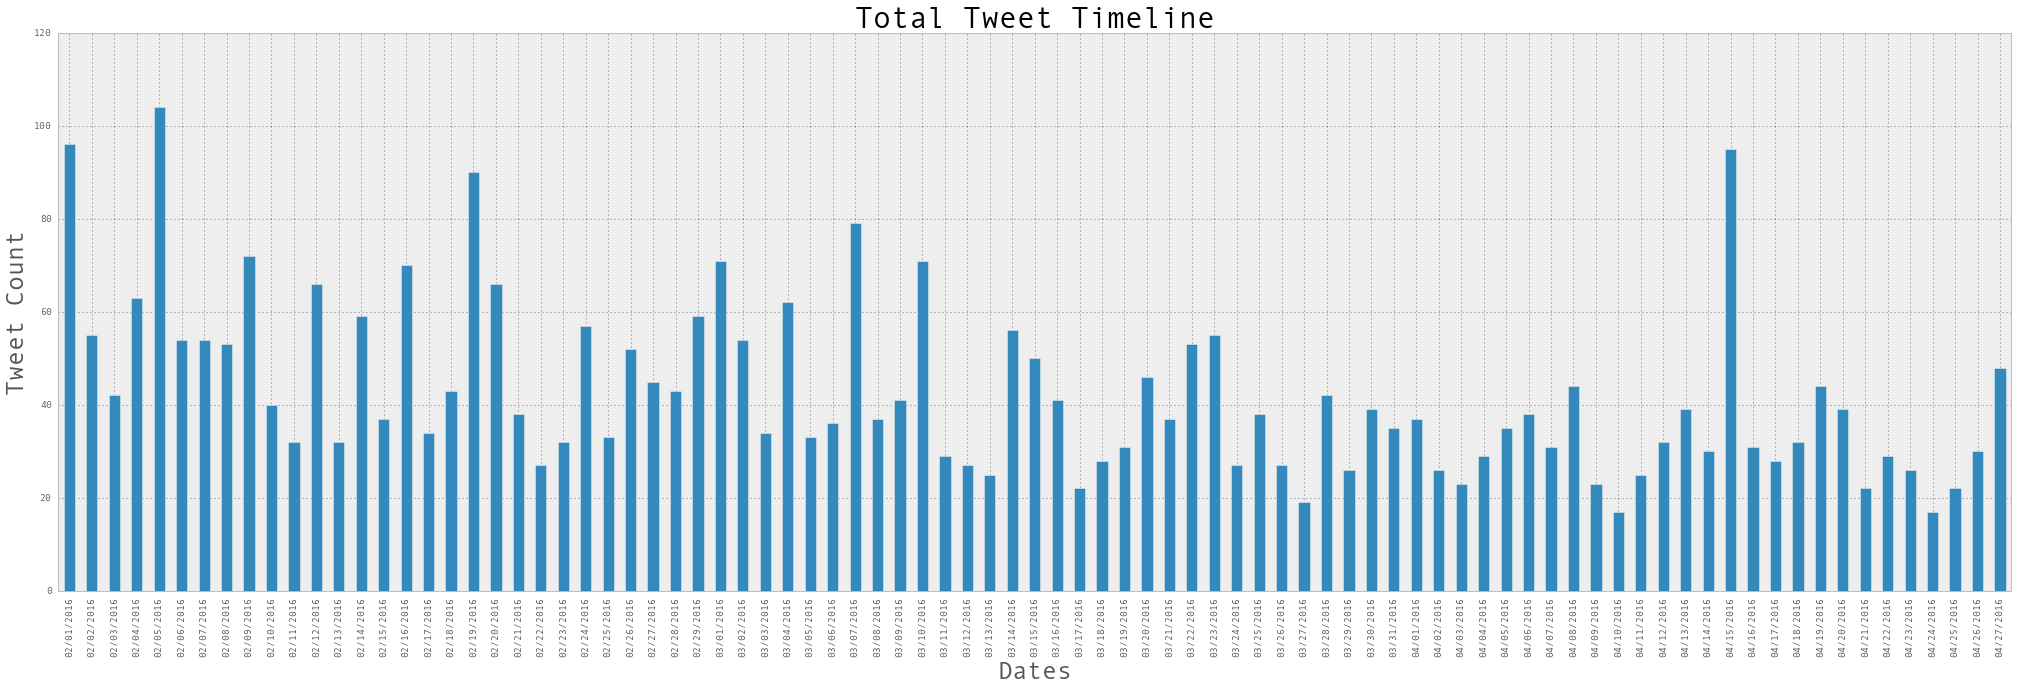

In [81]:
#Total Tweets overtime for both candidates
plt.rcParams['figure.figsize'] = (35, 10)

# Plot the Time Zone data as a bar-graph
number_tweets.plot(kind='bar')

plt.xlabel('Dates', fontsize=25)
plt.ylabel('Tweet Count', fontsize=25)
plt.title('Total Tweet Timeline', fontsize=30, fontweight='bold')



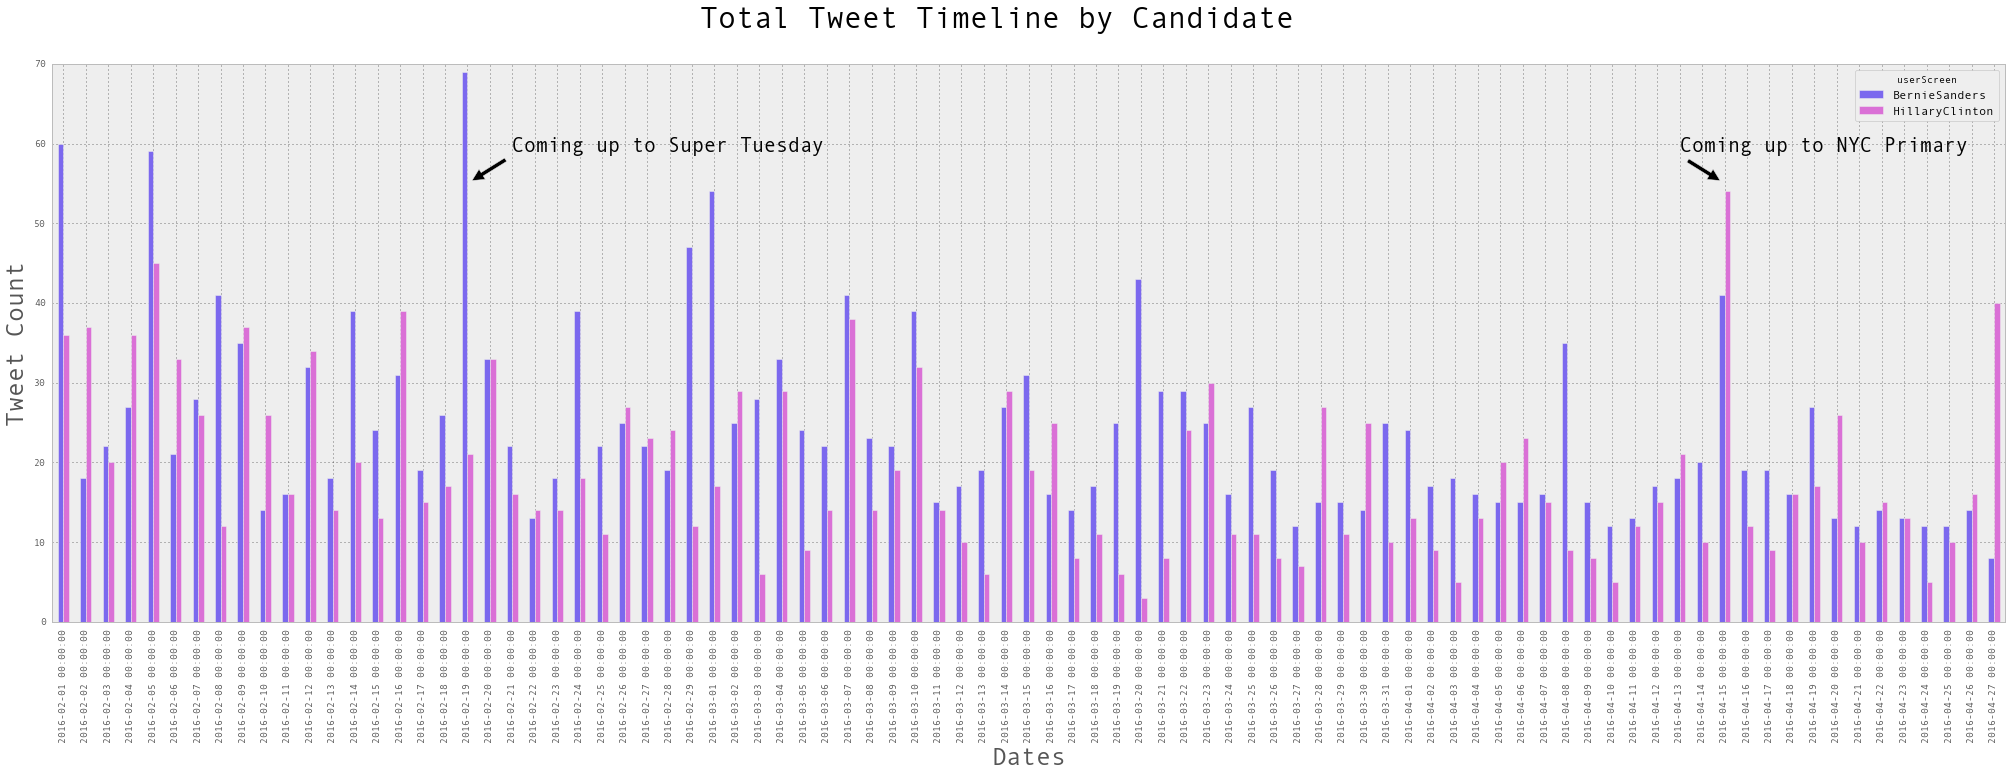

In [82]:
fig, ax = plt.subplots()

fig.suptitle('Total Tweet Timeline by Candidate', fontsize=30, fontweight='bold')
AllCandidateTweets.T.plot(ax=ax, 
        kind='bar',                 # line plot 
        color=['mediumslateblue', 'orchid'],)   # line color 
ax.set_xlabel('Dates', fontsize=25)
ax.set_ylabel('Tweet Count', fontsize=25)

ax.annotate('Coming up to NYC Primary', color= 'black', xy=(74, 55), xytext=(72, 59),weight='bold',
            arrowprops=dict(facecolor='black', shrink=0.1), size=20)

ax.annotate('Coming up to Super Tuesday', color = 'black', xy=(18, 55), xytext=(20, 59), weight='bold',
            arrowprops=dict(facecolor='black', shrink=0.1), size=20)

To compare the above Twitter activity to the election results, below shows the number of delegates won by each candidate over time as well as the Tweets broken out side by side as well.

In [77]:
Sum.iplot(kind='bar',
          subplots=True,
          color=['#DE5D83','#0048BA'],
          subplot_titles=True, 
          legend=False,
         layout = dict(
    autosize=False,
    title='Delegate Wins Over Time',
    showlegend=False,
    width=950,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4)))


In [83]:
AllCandidateTweets.T.iplot(kind='bar', subplots=True, subplot_titles=True, layout = dict(
    autosize=False,
    title='Candidate Tweets Over Time',
    width=975,
    height=500))

## Conclusion / Learnings

Did the candidates' activity on Twitter effect election results? Without widening the scope to look at the public's sentiments on Twitter, it is hard to tell, but the candidate's behavior seems to remain too consistent throughout to have any real effect on electoral outcomes. However it can be said that the candidates do turn to Twitter (and most likely other social media platforms) to communicate with the public during significant election events (Super Tuesday, New York Primary & Debate).

- Twitter activity over the course of the election has decreased overall - perhaps that means that candidates have gotten smarter with strategically using Twitter and not overwhelming the public with too many posts
- Bernie has been less active towards the end of this period, specifically after the New York primaries which many considered the point that Hillary secured the nomination. The decline in tweets could be a sign of him reigning his efforts in and slowly ending his campaign.
- Hillary's most active tweeting has occured as Bernie drops down, also timed with the New York visit. Could this be a sign of her ramping up with an eye towards the general election?

Further study would be required to see if these emerging patterns are truly a sign of the Democratic primaries turning a corner, or simply a blip within the longer Primary Election timeframe. The sheer volume of tweets, retweets, and favorites between these two candidates however does clearly show how Twitter has become an integral part of the American political landscape.